In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


df = pd.read_csv('air_quality_health_impact_data.csv')

#select features and target
X = df[['AQI','PM10','PM2_5','NO2','SO2','O3','Temperature','Humidity','WindSpeed']]

y = df['HealthImpactClass']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LogisticClassifier = LogisticRegression(max_iter = 1000)

LogisticClassifier.fit(X_train, y_train)

y_pred = LogisticClassifier.predict(X_test)


print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.8718830610490111


/Users/daviddechantsreiter/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       953
         1.0       0.60      0.40      0.48       123
         2.0       0.52      0.22      0.31        58
         3.0       0.00      0.00      0.00        21
         4.0       0.00      0.00      0.00         8

    accuracy                           0.87      1163
   macro avg       0.41      0.32      0.35      1163
weighted avg       0.83      0.87      0.84      1163



/Users/daviddechantsreiter/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daviddechantsreiter/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daviddechantsreiter/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [37]:
print(df['HealthImpactClass'].value_counts())

0.0    4808
1.0     579
2.0     273
3.0      95
4.0      56
Name: HealthImpactClass, dtype: int64


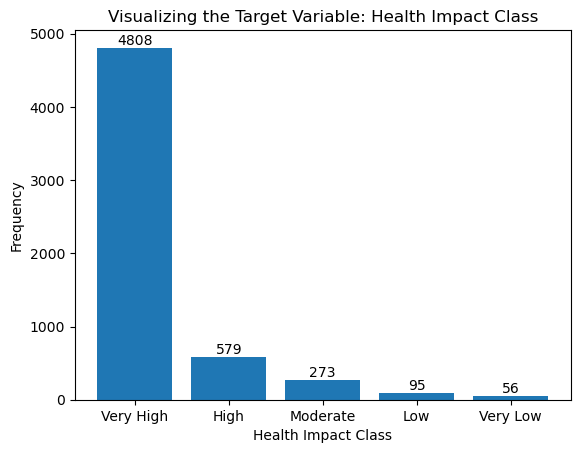

In [38]:
# Assuming df is your DataFrame and it contains the column 'HealthImpactClass'
plt.bar(['Very High', 'High', 'Moderate', 'Low', 'Very Low'], df['HealthImpactClass'].value_counts().values)
plt.xlabel('Health Impact Class')
plt.ylabel('Frequency')
plt.title('Visualizing the Target Variable: Health Impact Class')

for i, v in enumerate(df['HealthImpactClass'].value_counts().values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
    
    
plt.show()

In [39]:
filtered_df = df[df['HealthImpactClass'].isin([0, 1, 2])]

X = filtered_df[['AQI','PM10','PM2_5','NO2','SO2','O3','Temperature','Humidity','WindSpeed']]

y = filtered_df['HealthImpactClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

LogisticClassifier_filtered = LogisticRegression(max_iter = 1000)

LogisticClassifier_filtered.fit(X_train, y_train)

y_pred = LogisticClassifier_filtered.predict(X_test)


print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL: 0.9143109540636042


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       968
         1.0       0.59      0.55      0.57       103
         2.0       0.58      0.18      0.28        61

    accuracy                           0.91      1132
   macro avg       0.71      0.58      0.61      1132
weighted avg       0.90      0.91      0.90      1132



In [41]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_clf = RandomForestClassifier(n_estimators = 100)

RandomForest_clf.fit(X_train, y_train)

y_pred_forest = RandomForest_clf.predict(X_test)


print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred_forest))

ACCURACY OF THE MODEL: 0.931095406360424


In [42]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       968
         1.0       0.68      0.65      0.67       103
         2.0       0.84      0.43      0.57        61

    accuracy                           0.93      1132
   macro avg       0.83      0.69      0.74      1132
weighted avg       0.93      0.93      0.92      1132



In [44]:
from sklearn.svm import SVC
import time

# Record start time
start_time = time.time()

SupportVector_clf = SVC(kernel = 'linear')

SupportVector_clf.fit(X_train, y_train)

y_pred_svc = SupportVector_clf.predict(X_test)


print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred_svc))

end_time = time.time()

print('Time taken: ', end_time-start_time)

ACCURACY OF THE MODEL: 0.9302120141342756
Time taken:  72.35843992233276


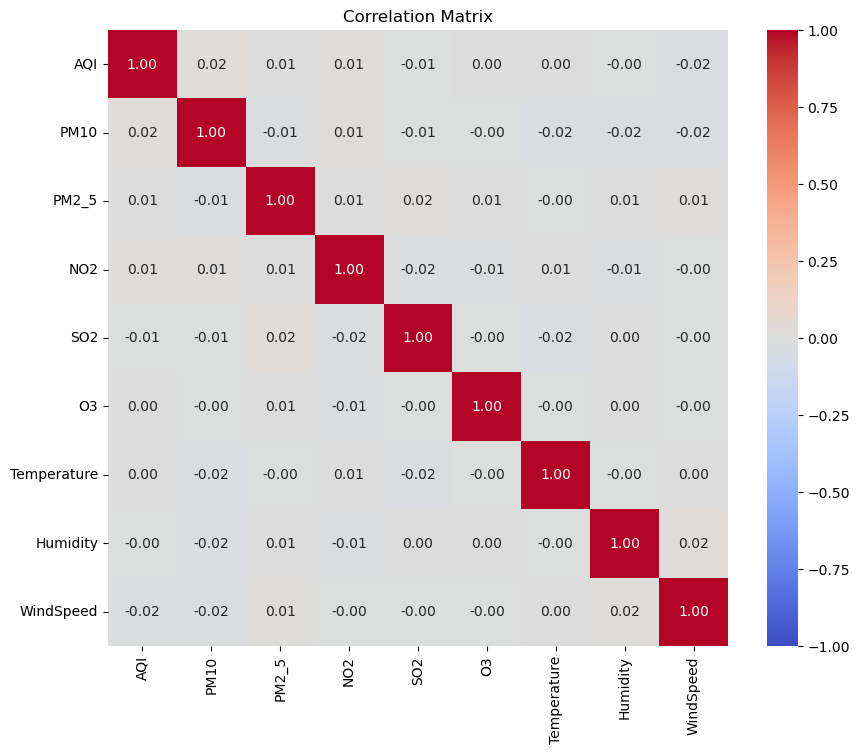

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()